### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read data

In [6]:
portfolio_a_path = Path("../Resources/tech_stocks_2018_a.csv")
portfolio_b_path = Path("../Resources/tech_stocks_2018_b.csv")
risk_free_rate_path= Path("../Resources/risk_free_rate.csv")

portfolio_a = pd.read_csv(portfolio_a_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_b = pd.read_csv(portfolio_b_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
risk_free_rate = pd.read_csv(risk_free_rate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_a.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2019-08-23,202.64,133.39,1151.29,177.75,1749.62
2019-08-22,212.46,137.78,1189.53,182.04,1805.60
2019-08-21,212.64,138.79,1191.25,183.55,1823.54
2019-08-20,210.36,137.26,1182.69,183.81,1801.38
2019-08-19,210.35,138.41,1198.45,186.17,1816.12


### Calculate Annualized Std Dev

In [11]:
# Calculate daily returns
daily_returns_a = portfolio_a.pct_change()
daily_returns_b = portfolio_b.pct_change()
# Concat returns and risk-free rate into one DataFrame
all_portfolio_returns = pd.concat([daily_returns_a, daily_returns_b, risk_free_rate], axis="columns", join="inner")
all_portfolio_returns.head()

,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,IBM,MU,rf_rate
Date,,,,,,,,,,,
2019-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000214
2019-08-22,0.048460,0.032911,0.033215,0.024135,0.031996,-0.729718,-0.760852,-0.963363,-0.244332,0.042365,0.000218
2019-08-21,0.000847,0.007331,0.001446,0.008295,0.009936,0.034325,-0.006270,0.014699,-0.000521,-0.013622,0.000214
2019-08-20,-0.010722,-0.011024,-0.007186,0.001417,-0.012152,-0.017476,-0.030915,-0.011916,-0.009311,0.001358,0.000211
2019-08-19,-0.000048,0.008378,0.013326,0.012839,0.008183,0.001078,0.024740,-0.013951,0.015338,0.017635,0.000211


In [16]:
# Calculate Sharpe Ratio
#all_portfolio_returns.mean().head()
sharpe_ratios = ((all_portfolio_returns.mean()-all_portfolio_returns["rf_rate"].mean()) * 252) /  (all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios.head()

AAPL    0.161418
MSFT   -0.872653
GOOG    0.054781
FB     -0.068044
AMZN    0.239557
dtype: float64

### Plot sharpe ratios

<AxesSubplot:>

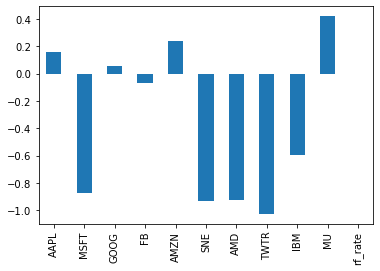

In [19]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar")